In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pydotplus
from IPython.display import Image  
from sklearn.svm import SVC

### Read the images

In [2]:
before_images = {}
after_images = {}
difference_images = {}

for i in range(1,26):
    before_images[i] = cv2.imread("data/before/" + str(i) + ".jpg")
    after_images[i] = cv2.imread("data/after/" + str(i) + ".jpg")
    difference_images[i] = cv2.subtract(after_images[i],before_images[i])
    
labels = pd.read_table("data/deforestation_labels.txt", header=None)

### Plot some images

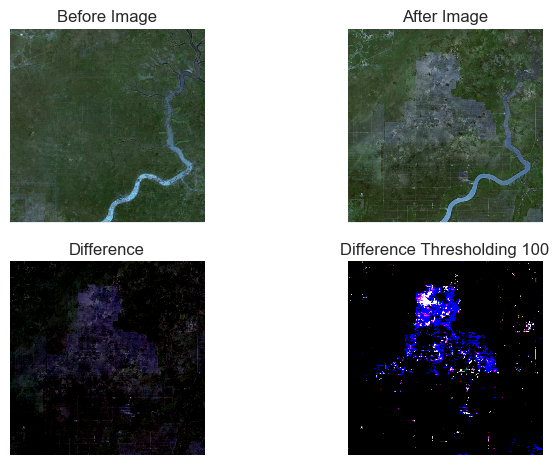

In [3]:
#Example with deforestation

before = before_images[19]
after = after_images[19]
difference = difference_images[19]

#Threshold image
ret,thresh1 = cv2.threshold(difference,50,255,cv2.THRESH_BINARY)


titles = ['Before Image', 'After Image','Difference', 'Difference Thresholding 100']
images = [before, after, difference, thresh1]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


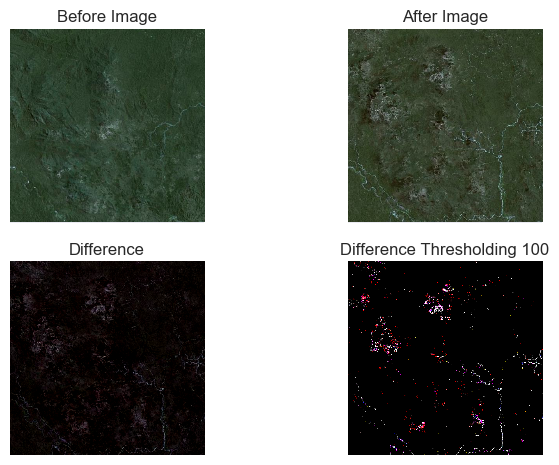

In [4]:
#Example without deforestation

before = before_images[4]
after = after_images[4]
difference = difference_images[4]

#Threshold image
ret,thresh1 = cv2.threshold(difference,50,255,cv2.THRESH_BINARY)


titles = ['Before Image', 'After Image','Difference', 'Difference Thresholding 100']
images = [before, after, difference, thresh1]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



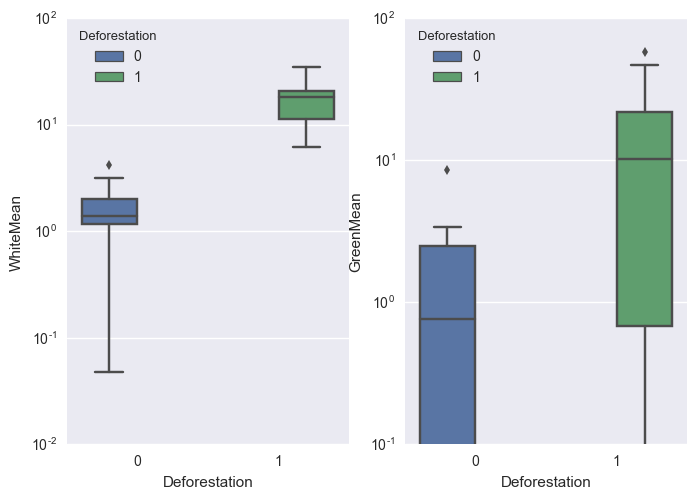

In [43]:
plt.subplot(1,2,1)
sns.boxplot(data=white_df, x="Deforestation", y  = "WhiteMean", hue = "Deforestation")
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(data=white_df, x="Deforestation", y  = "GreenMean", hue = "Deforestation")
plt.yscale("log")
plt.show()

In [49]:
threshold_images= {}
red_mean = list()
green_mean = list()
blue_mean = list()

for i in range(1,26):
    grayscale = cv2.mean(cv2.cvtColor(difference_images[i], cv2.COLOR_BGR2GRAY))
    red = cv2.mean(difference_images[i])[2]
    green = cv2.mean(difference_images[i])[1]
    blue = cv2.mean(difference_images[i])[0]
    red_mean.append(red)
    green_mean.append(green)
    blue_mean.append(blue)
    gray_mean.append(grayscale)

mean_df = pd.DataFrame()
mean_df['RedMean'] = red_mean
mean_df['GreenMean'] = green_mean
mean_df['BlueMean'] = blue_mean
mean_df['Deforestation'] = labels

### Fit SVM

In [52]:
X = mean_df[['RedMean', 'BlueMean']]
y = mean_df.Deforestation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

svm = SVC(kernel='linear').fit(X_train,y_train)

y_pred = svm.predict(X_test)
print("F1-Score: " + str(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

F1-Score: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         3



#### Estimate Decision Boundary

In [54]:
I = svm.intercept_
W = svm.coef_[0]
#y = a*x - b
a = -W[0]/W[1]
b = I[0]/W[1]
print(a)
print(b)

1.27153858192
0.762457744846


In [55]:
x = range(5,20)
decision_bound = [a*xi - b for xi in x]

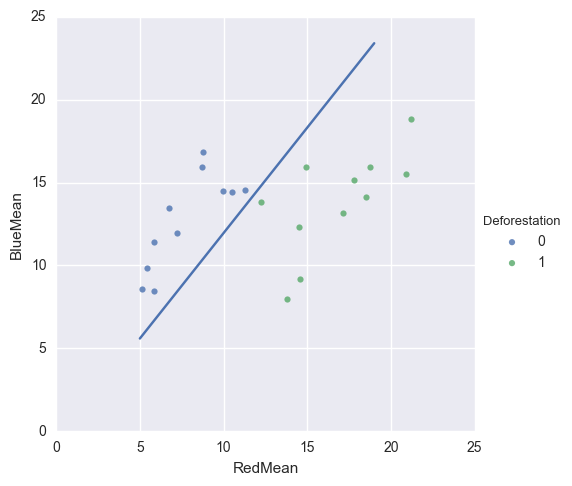

In [59]:
train_df = pd.DataFrame()
train_df['RedMean'] = X_train['RedMean']
train_df['BlueMean'] = X_train['BlueMean']
train_df['Deforestation'] = y_train

sns.lmplot("RedMean", "BlueMean", data=train_df, hue = "Deforestation", fit_reg=False)
plt.plot(x,decision_bound)
plt.show()